# A Sentiment Analysis Case Study

## dataset

In [ ]:
import pandas as pd

df = pd.read_csv('./movie_data.csv')
df.head(10)

,review,sentiment
0,"In 1974, the teenager Martha Moxley (Maggie Gr...",1
1,OK... so... I really like Kris Kristofferson a...,0
2,"***SPOILER*** Do not read this, if you think a...",0
3,hi for all the people who have seen this wonde...,1
4,"I recently bought the DVD, forgetting just how...",0
5,Leave it to Braik to put on a good show. Final...,1
6,Nathan Detroit (Frank Sinatra) is the manager ...,1
7,"To understand ""Crash Course"" in the right cont...",1
8,I've been impressed with Chavez's stance again...,1
9,This movie is directed by Renny Harlin the fin...,1


## TF-IDF

$$\text{tf-idf}(t,d)=\text{tf (t,d)}\times \text{idf}(t,d)$$


$$\text{idf}(t,d) = \text{log}\frac{n_d}{1+\text{df}(d, t)},$$

where $n_d$ is the total number of documents, and df(d, t) is the number of documents d that contain the term t.

**The equations for the idf and tf-idf that are implemented in scikit-learn are:**

The tf-idf equation that is implemented in scikit-learn is as follows:

$$\text{tf-idf}(t,d) = \text{tf}(t,d) \times (\text{idf}(t,d)+1)$$


$$\text{idf} (t,d) = log\frac{1 + n_d}{1 + \text{df}(d, t)}$$

where $n_d$ is the total number of documents, and df(d, t) is the number of documents d that contain the term t.

In [ ]:
# example on sklearn
import pandas as pd
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
import numpy as np
corpus =["the house had a tiny little mouse",
      "the cat saw the mouse",
      "the mouse ran away from the house",
      "the cat finally ate the mouse",
      "the end of the mouse story"]

In [ ]:
#instantiate CountVectorizer()
cv=CountVectorizer()
 
# this steps generates word counts for the words in your docs
word_count_vector=cv.fit_transform(corpus)

In [ ]:
word_count_vector.shape 

(5, 16)

In [ ]:
#idf
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(word_count_vector)

TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True)

In [ ]:
# print idf values
df_idf = pd.DataFrame(tfidf_transformer.idf_, index=cv.get_feature_names(),columns=["idf_weights"])
 
# sort ascending
df_idf.sort_values(by=['idf_weights'])

,idf_weights
mouse,1.000000
the,1.000000
cat,1.693147
house,1.693147
ate,2.098612
away,2.098612
end,2.098612
finally,2.098612
from,2.098612
had,2.098612


In [ ]:
# count matrix
count_vector=cv.transform(corpus)
 
# tf-idf scores
tf_idf_vector=tfidf_transformer.transform(count_vector)
 

In [ ]:
feature_names = cv.get_feature_names()
 
#get tfidf vector for first document
first_document_vector=tf_idf_vector[0]
 
#print the scores
df_tfidf = pd.DataFrame(first_document_vector.T.todense(), index=feature_names, columns=["tfidf"])
df_tfidf.sort_values(by=["tfidf"],ascending=False)

,tfidf
had,0.493562
little,0.493562
tiny,0.493562
house,0.398203
mouse,0.235185
the,0.235185
ate,0.000000
away,0.000000
cat,0.000000
end,0.000000


In [ ]:
pd.DataFrame(tf_idf_vector.toarray(), columns=feature_names)

,ate,away,cat,end,finally,from,had,house,little,mouse,of,ran,saw,story,the,tiny
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.493562,0.398203,0.493562,0.235185,0.000000,0.000000,0.000000,0.000000,0.235185,0.493562
1,0.000000,0.000000,0.483344,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.285471,0.000000,0.000000,0.599092,0.000000,0.570941,0.000000
2,0.000000,0.457093,0.000000,0.000000,0.000000,0.457093,0.000000,0.368780,0.000000,0.217807,0.000000,0.457093,0.000000,0.000000,0.435614,0.000000
3,0.513923,0.000000,0.414630,0.000000,0.513923,0.000000,0.000000,0.000000,0.000000,0.244887,0.000000,0.000000,0.000000,0.000000,0.489774,0.000000
4,0.000000,0.000000,0.000000,0.491753,0.000000,0.000000,0.000000,0.000000,0.000000,0.234323,0.491753,0.000000,0.000000,0.491753,0.468646,0.000000


In [ ]:
# Tfidfvectorizer

from sklearn.feature_extraction.text import TfidfVectorizer 
 
# settings that you use for count vectorizer will go here 
tfidf_vectorizer=TfidfVectorizer(use_idf=True)
 
# just send in all your docs here
tfidf_vectorizer_vectors=tfidf_vectorizer.fit_transform(corpus)

In [ ]:
# get the first vector out (for the first document)
first_vector_tfidfvectorizer=tfidf_vectorizer_vectors[0]
 
# place tf-idf values in a pandas data frame
df_tfidf = pd.DataFrame(first_vector_tfidfvectorizer.T.todense(), index=tfidf_vectorizer.get_feature_names(), columns=["tfidf"])
df_tfidf.sort_values(by=["tfidf"],ascending=False)

,tfidf
had,0.493562
little,0.493562
tiny,0.493562
house,0.398203
mouse,0.235185
the,0.235185
ate,0.000000
away,0.000000
cat,0.000000
end,0.000000


# Data preprocessing

In [ ]:
import re
def preprocessor(text):
    text = re.sub('<[^>]*>', '', text) 
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', text)
    text = re.sub('[\W]+', ' ', text.lower()) +\
        ' '.join(emoticons).replace('-', '') #keep alphanumeric caracters only + lower + emoticons at the end of each phrase
    return text

In [ ]:
preprocessor("shit <> shit")

'shit shit'

In [ ]:
preprocessor("</a>This :) is :( the 9th test :-)!")

'this is the 9th test :) :( :)'

In [ ]:
re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', "</a>This :) is :( the 9th test :-)!")

[':)', ':(', ':-)']

In [ ]:
df['review'] = df['review'].apply(preprocessor)

In [ ]:
df

,review,sentiment
0,in 1974 the teenager martha moxley maggie grac...,1
1,ok so i really like kris kristofferson and his...,0
2,spoiler do not read this if you think about w...,0
3,hi for all the people who have seen this wonde...,1
4,i recently bought the dvd forgetting just how ...,0
...,...,...
49995,ok lets start with the best the building altho...,0
49996,the british heritage film industry is out of c...,0
49997,i don t even know where to begin on this one i...,0
49998,richard tyler is a little boy who is scared of...,0


# Tokenization

In [ ]:
from nltk.stem.porter import PorterStemmer

porter = PorterStemmer()

def tokenizer(text):
    return text.split()


def tokenizer_porter(text):
    return [porter.stem(word) for word in text.split()]

# ML

In [ ]:
X_train = df.loc[:25000, 'review'].values
y_train = df.loc[:25000, 'sentiment'].values
X_test = df.loc[25000:, 'review'].values
y_test = df.loc[25000:, 'sentiment'].values

In [ ]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV

tfidf = TfidfVectorizer(strip_accents=None,
                        lowercase=False,
                        preprocessor=None,
                       tokenizer=tokenizer,
                       stop_words=stop)
lr_tfidf = Pipeline([('vect', tfidf),
                     ('clf', LogisticRegression(random_state=0))])

In [ ]:
lr_tfidf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('vect',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=False, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you...
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=<function tokenizer at 0x00000249B6641AF8>,
                                 use_idf=True, vocabulary=None)),
                ('clf',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,

In [ ]:
print('Test Accuracy: %.3f' % lr_tfidf.score(X_test, y_test))

Test Accuracy: 0.895


In [ ]:
lr_tfidf.predict(["I love this movie"])

array([1], dtype=int64)

In [ ]:
y_pred = lr_tfidf.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
confusion_matrix = confusion_matrix(y_test, y_pred)

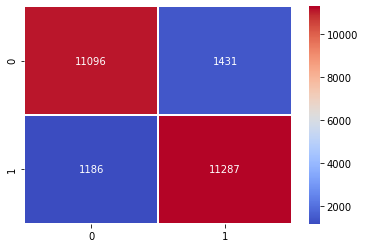

In [ ]:
sns.heatmap(confusion_matrix, annot=True, linewidths=0.5, fmt="d",cmap = "coolwarm")